# Matplotlib Tutorial

#### Load necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Real World Examples

#### Line Graph (Gas Prices Data)

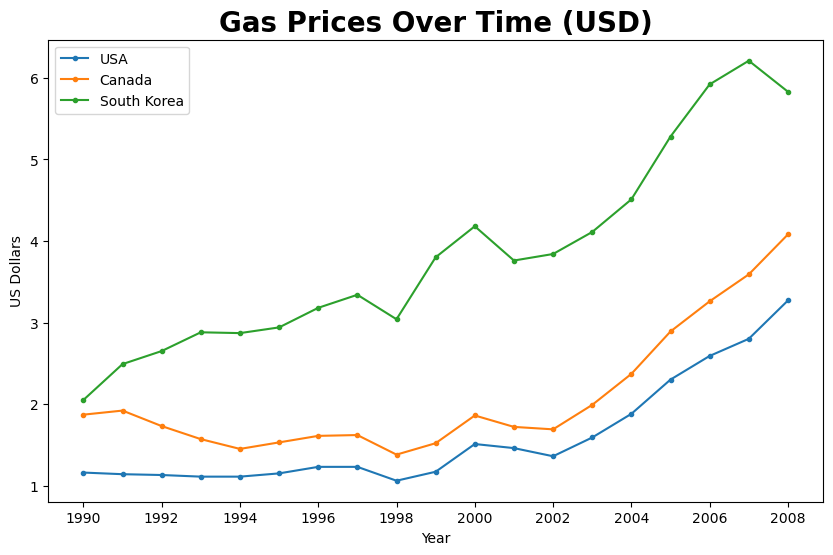

In [30]:
# read gas prices csv file
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize =(10, 6)) # enlarge graph

# title graph with bold font
plt.title('Gas Prices Over Time (USD)', fontdict = {'fontweight': 'bold', 'fontsize': 20})

# show line graph of gas prices in USA each year
plt.plot(gas['Year'], gas['USA'], label = 'USA', marker = '.')

# show line graph of gas prices in Canada each year
plt.plot(gas['Year'], gas['Canada'], label = 'Canada', marker = '.')

# show line graph of gas prices in South Korea each year
plt.plot(gas['Year'], gas['South Korea'], label = 'South Korea', marker = '.')

plt.xticks(gas['Year'][::2]) # increment years by 2 on x-axis

plt.xlabel('Year') # label x-axis
plt.ylabel('US Dollars') # label y-axis

plt.legend() # show labels

plt.savefig('gas_price_figure', dpi = 300) # save graph

plt.show() # show graph

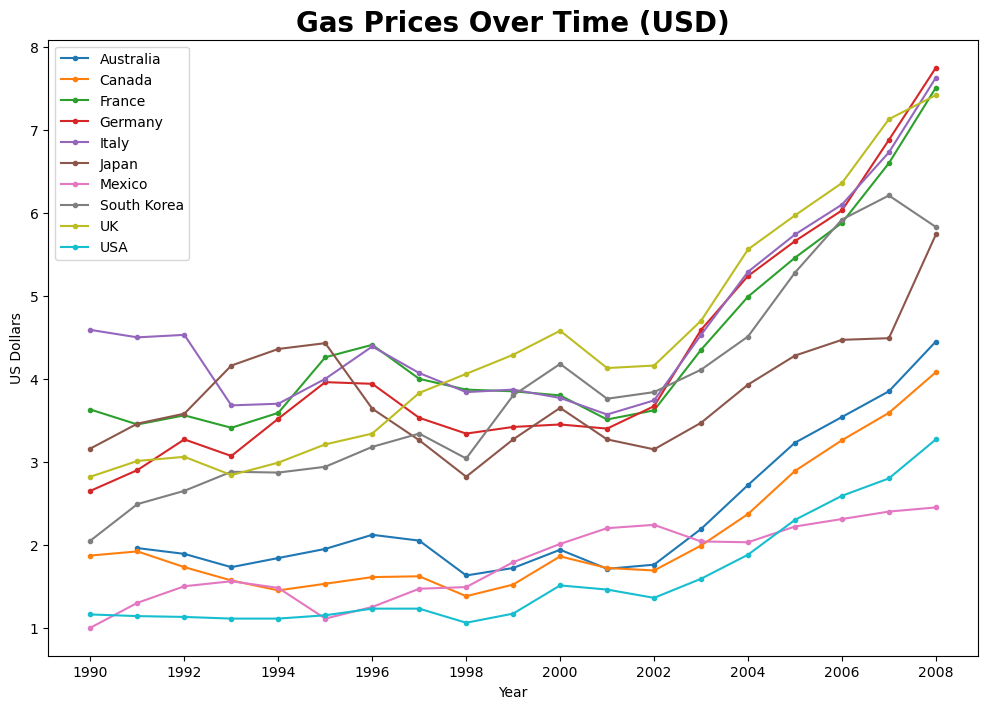

In [29]:
# read gas prices csv file
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize =(12, 8)) # enlarge graph to accomodate legend

# title graph with bold font
plt.title('Gas Prices Over Time (USD)', fontdict = {'fontweight': 'bold', 'fontsize': 20})

# show line graph of all gas prices in every country each year

for country in gas:
    if country != 'Year':
        plt.plot(gas['Year'], gas[country], label = country, marker = '.')


plt.xticks(gas['Year'][::2]) # increment years by 2 on x-axis

plt.xlabel('Year') # label x-axis
plt.ylabel('US Dollars') # label y-axis

plt.legend() # show labels

plt.savefig('gas_price_figure', dpi = 300) # save graph

plt.show() # show graph

#### Histogram (Fifa Players Data)

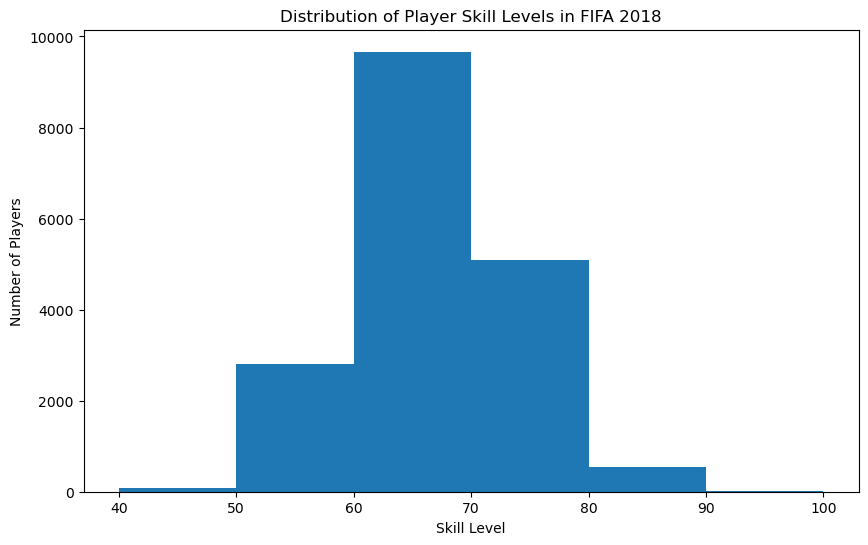

In [42]:
fifa = pd.read_csv('fifa_data.csv')

plt.figure(figsize =(10, 6)) # enlarge graph

bins = [40, 50, 60, 70, 80, 90, 100] # ranges of overall skill ratings

plt.hist(fifa['Overall'], bins = bins) # plot histogram of overall skill ratings

plt.xticks(bins) # set x-axis ticks to the range of overall skill ratings

plt.title('Distribution of Player Skill Levels in FIFA 2018')

plt.xlabel('Skill Level')
plt.ylabel('Number of Players')

plt.savefig('skill_level_dist_figure', dpi = 300) # save graph

plt.show() # show histogram

#### Pie Chart (Fifa Players Data)

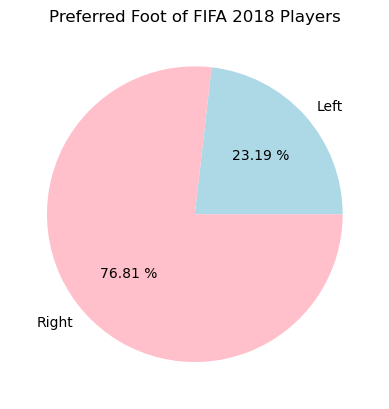

In [74]:
# count all players who use left foot
left = fifa['Preferred Foot'].value_counts()['Left']

# count all right-footed players
right = fifa['Preferred Foot'].value_counts()['Right']

labels = ['Left', 'Right'] # add labels 

colors = ['lightblue', 'pink'] # change colors 


# create pie chart with labels and colors
# add auto-percentage with 2 decimal places 
plt.pie([left, right], labels = labels, colors = colors, autopct = '%.2f %%') 

plt.title('Preferred Foot of FIFA 2018 Players')

plt.show() # show pie chart

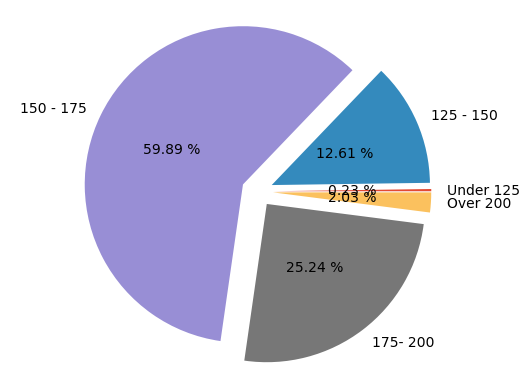

In [114]:
# Use pie chart to analyze the distribution of players' weights
# convert the weight to an integer if its a string

fifa['Weight'] = [int(x.strip('lbs')) if type(x) == str else x for x in fifa['Weight']]

plt.style.use('ggplot') # change color scheme

# light-weight players are less than 125 lbs
light = len(fifa.loc[fifa['Weight'] < 125])

# players between light-weight and medium-weight are above or equal to 125 lbs and less than 150 lbs
light_medium = len(fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)])

# medium-weight players are above or equal to 150 lbs and less than 175 lbs
medium = len(fifa.loc[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)])

# players between medium-weight and heavy-weight are above or equal to 175 lbs and less than 200 lbs
medium_heavy = len(fifa.loc[(fifa['Weight'] >= 175) & (fifa['Weight'] < 200)])

# heavy-weight players are above or equal to 200 lbs
heavy = len(fifa.loc[(fifa['Weight'] >= 200)])

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125 - 150', '150 - 175', '175- 200', 'Over 200']

# use explode method to break apart chart for easier readability
explode = (.1, .1, .1, .1, .1)

# pctdistance allows you to control how far the percentages are from the center of pie chart
plt.pie(weights, labels = labels, autopct = '%.2f %%', pctdistance = 0.5, explode = explode)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show() # show pie chart

#### Box & Whiskers Chart (Fifa Players Data)

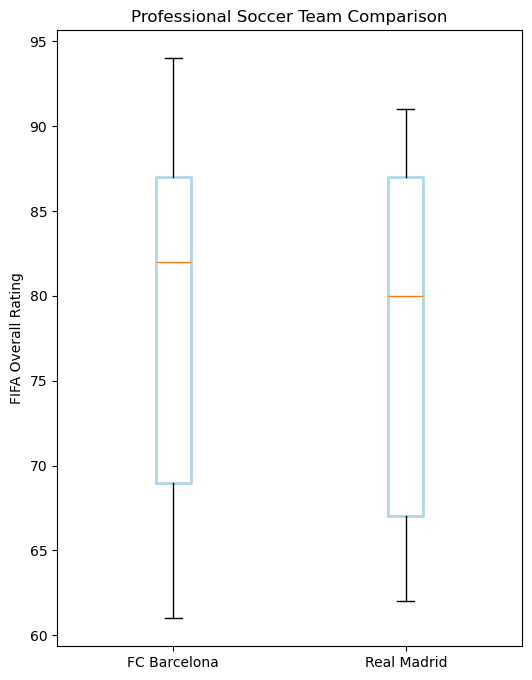

In [132]:
# compare different teams
# get all players from FC Barcelona

plt.style.use('default') # remove residual color scheme from previous cell group

plt.figure(figsize =(6, 8)) # enlarge graph

labels = ['FC Barcelona', 'Real Madrid'] # box labels 

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']

# get all players from Real Madrid
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']

# create boxplot and add labels
boxes = plt.boxplot([barcelona, madrid], tick_labels = labels)

# add color and line width to all boxes

for box in boxes['boxes']:
    box.set(color = 'lightblue', linewidth = 2)

plt.title('Professional Soccer Team Comparison') # add title

plt.ylabel('FIFA Overall Rating') # label y-axis

plt.show() # show boxplot